In [1]:
from ifs_etc.etc2d.config import build_default_source
from ifs_etc.etc1d.perform_calculation import perform_calculation

In [2]:
from chili_etc.sp.chili_config import build_default_calc
from chili_etc.sp.chili_perform_calculation import perform_calculation
chili_config = build_default_calc()
report = perform_calculation(chili_config)
print(report.snr)

[3.1210689  3.16526209 3.20073055 ... 2.87464531 2.86900359 2.86689038]


In [5]:
chili_config = build_default_calc()
chili_config['obst'] = 300
chili_config['repn'] = 3
chili_config['source']['normalization']['value'] = 18.0
#chili_config['source']['spectrum']['name'] = 'SFgal_texp_FeH-2_tau10_Ew200.fits'
report = perform_calculation(chili_config)
print(report.snr)
#print('chili_config['source']['spectrum']['name']  = ',chili_config['source']['spectrum']['name'] )

[0.92843857 0.94174381 0.95242538 ... 0.85432544 0.85263026 0.85199531]


(3703,)


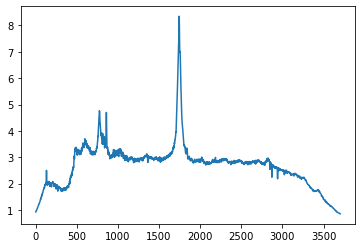

In [6]:
import matplotlib.pyplot as plt
#plt.plot(report.snr)
snrs = report.snr
print(snrs.shape)
plt.plot(snrs)

In [7]:
from astropy.io import fits
def openfits(b):
    hdu_list = fits.open(b)
    hdu_list.info()
    image_data = hdu_list[0].data
    plt.imshow(image_data, cmap='gray')
    plt.colorbar()
    plt.show()
hdu = fits.open(r"C:\Users\DELL\Anaconda3\Lib\site-packages\chili_etc\refdata\sed\SFgal_texp_FeH0_tau5_Ew10_AGN1.fits")
print(hdu[1].header)
imagn = hdu[1].data

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                   16 / length of dimension 1                          NAXIS2  =                 5564 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                    4 / number of table fields                         TTYPE1  = 'WAVELENGTH'                                                          TFORM1  = 'E       '                                                            TUNIT1  = 'angstrom'                                                            TTYPE2  = 'FLUX    '                                                            TFORM2  = 'E       '                    

In [8]:
print(imagn.shape)
template_wave = hdu[1].data['wavelength']
template_flux = hdu[1].data['flux'] * 1e-12

(5564,)


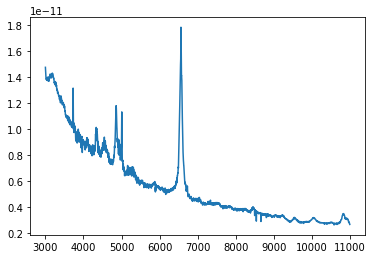

In [9]:
plt.plot(template_wave,template_flux)

In [10]:

report = perform_calculation(chili_config, calculation_mode='snr2exptime')
print(report.exptime)

NameError: name 'config' is not defined

In [ ]:
report = perform_calculation(config, calculation_mode='exptime2snr')
print(report.snr)
plt.plot(report.snr)

In [ ]:
report = perform_calculation(config, calculation_mode='snr2limitmag')
print(report.limitmag)

In [ ]:
config = build_default_calc()
config['targetsnr'] = 10
config['obst'] = 300
config['source']['normalization']['value'] = 18.0
config['source']['spectrum']['name'] = 'SFgal_texp_FeH0_tau1_Ewd.fits'
report = perform_calculation(config, calculation_mode='snr2exptime')
print(report.exptime)

In [11]:
# # https://ifs-etc.readthedocs.io/en/latest/quickstart.html

# from ifs_etc.etc2d.ifs_etc import build_input_para
# config = build_input_para()

# #####################################################
# IFS Exposure Time Calculator              #
# (Use default value when press enter and no input)  #
# #####################################################

# 1. Spectral Resolution: 3.5 Angstrom per 2 pixels (fixed)
# Spectral coverage: 3500-10000 A

# 2. CCD parameters:
# 1. Dispersion axis binning: 1 pixel
# 2. Spatial axis binning: 1 pixel
# 3. Gain: 1 e-/ADU
# 4. Dark: 0.017 e-/s/pixel
# Reset the parameters or use the default value? (r|d): d
# Use the default CCD parameters.

# 3. Specify the calculation mode:
# 1. How many visits needed to obtain a certain SNR.
# 2. SNR reached in certain visits.
# (Set the exposure time = 300 seconds per visit.)
# which calculation mode (default = 1): 1
# The target SNR is (default = 20): 20
# Calculate the visits to obtain SNR = 20.0.

# 4. Define the source (position, shape, spectrum, brightness).
# How many sources to be considered (default = 1): 1
# Set the parameters for each source.
# 4. (1/5) Select the source type for source-1:
# 1. point source
# 2. extended source
# Enter the index (default = 1): 1
# 4. (2/5) Set the center position for source-1:
# Enter the x-offset [arcsec] (default = 0.0): 0.2
# Enter the y-offset [arcsec] (default = 0.0): 0.2
# 4. (3/5) Point source is set to have PSF shape with FWHM = 0.2".
# 4. (4/5) Choose a spectrum for the source-1:
# 1. Elliptical galaxy (bc03_FeH0_tau1_Ewd)
# 2. Spiral galaxy (bc03_FeH0_tau5_Ew5)
# 3. Starburst galaxy (bc03_FeH-2_tau10_Ew50)
# 4. AGN (FeH0_tau5_Ew10_AGN)
# 5. upload spectrum file [text format only, with two-columns: wavelength in A and flux in erg/s/cm^2/A]
# Enter the choise (default = 1): 1
# Enter the redshift (default = 0.0): 0.0
# Enter the E(B-V) (default = 0.0): 0.1
# 4. (5/5) Select the normalization type for source-1:
# 1. Normalized at certain wavelength.
# 2. Normalized at certain filter.
# Select the normalization type (default = 2): 2
# Filters: 1. sdss-u, 2. sdss-g, 3. sdss-r, 4. sdss-i, 5. sdss-z.
# Select the normalized filter (default = 2): 2
# Normalization unit: [add arcsec^-2 for extended source].
# 1. AB magnitude
# 2. erg/s/cm^2/A
# 3. erg/s/cm^2/Hz
# Select the normalization unit (default = 1): 1
# Enter the normalization value (default = 17.7): 17.7

# 5. Specify the background level:
# Zodiacal level: 1. low, 2. median, 3. high.
# Enter the choice (default = 2): 2
# Earth shine level: 1. low, 2. median, 3. high.
# Enter the choice (default = 2): 2